In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from scipy.spatial import KDTree #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html

In [4]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [5]:
path = '../../../../../02_Data/Re_10595/UFR3-30TestCase/'

# y/h, U/Ubulk, V/Ubulk, uu/Ubulk^2, vv/Ubulk^2, uv/Ubulk^2, k/Ubulk^2 
p000 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-001.dat') # x/h = 0.05
#p001 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-002.dat') # x/h = 0.5
p001 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-003.dat') # x/h = 1
p002 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-004.dat') # x/h = 2
p003 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-005.dat') # x/h = 3
p004 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-006.dat') # x/h = 4
p005 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-007.dat') # x/h = 5
p006 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-008.dat') # x/h = 6
p007 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-009.dat') # x/h = 7
p008 = np.loadtxt(path+'UFR3-30_C_10595_data_MB-010.dat') # x/h = 8

# add the column for x/h at the beginning
# 0    1    2        3        4           5           6           7 
# x/y, y/h, U/Ubulk, V/Ubulk, uu/Ubulk^2, vv/Ubulk^2, uv/Ubulk^2, k/Ubulk^2
p000_ = np.insert(p000, 0, 0.05*np.ones(p000.shape[0]), axis=1)
p001_ = np.insert(p001, 0, 1.0*np.ones(p001.shape[0]), axis=1)
p002_ = np.insert(p002, 0, 2.0*np.ones(p002.shape[0]), axis=1)
p003_ = np.insert(p003, 0, 3.0*np.ones(p003.shape[0]), axis=1)
p004_ = np.insert(p004, 0, 4.0*np.ones(p004.shape[0]), axis=1)
p005_ = np.insert(p005, 0, 5.0*np.ones(p005.shape[0]), axis=1)
p006_ = np.insert(p006, 0, 6.0*np.ones(p006.shape[0]), axis=1)
p007_ = np.insert(p007, 0, 7.0*np.ones(p007.shape[0]), axis=1)
p008_ = np.insert(p008, 0, 8.0*np.ones(p008.shape[0]), axis=1)

#ref = np.vstack((p000,p001,p002,p003,p004,p005,p006,p007,p008))
ref = np.vstack((p000_,p001_,p002_,p003_,p004_,p005_,p006_,p007_,p008_))

In [6]:
ref.shape

(4313, 8)

In [7]:
# x, y, label
cluster0 = np.loadtxt('cluster0.txt', delimiter=',', skiprows=1, converters={0: lambda s: s[1:], -1: lambda s: s[:-1]})
cluster1 = np.loadtxt('cluster1.txt', delimiter=',', skiprows=1, converters={0: lambda s: s[1:], -1: lambda s: s[:-1]})
cluster2 = np.loadtxt('cluster2.txt', delimiter=',', skiprows=1, converters={0: lambda s: s[1:], -1: lambda s: s[:-1]})

In [8]:
cluster0.shape, cluster1.shape, cluster2.shape

((10142, 3), (1329, 3), (20890, 3))

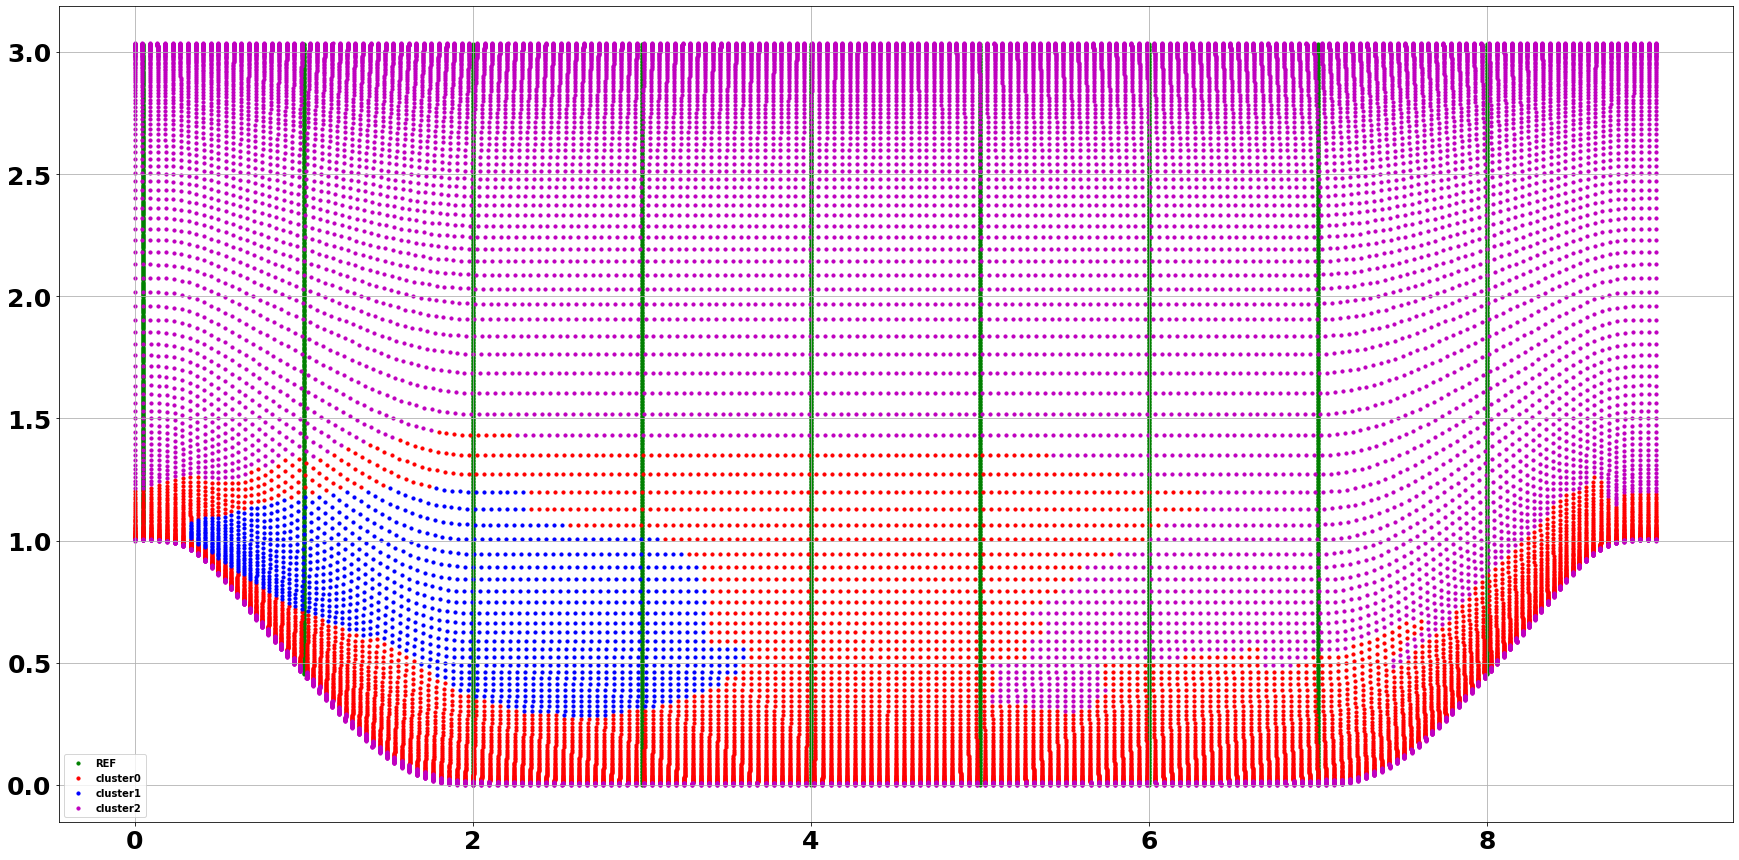

In [12]:
exp2num_solution = ref.copy()

x = ref[:,0]
y = ref[:,1]

plt.figure(figsize=(30,15))
plt.scatter(x, y,                         c='g', s=10, label='REF')
plt.scatter(cluster0[:,0], cluster0[:,1], c='r', s=10, label='cluster0')
plt.scatter(cluster1[:,0], cluster1[:,1], c='b', s=10, label='cluster1')
plt.scatter(cluster2[:,0], cluster2[:,1], c='m', s=10, label='cluster2')
plt.grid()
plt.legend()
plt.show()
plt.close()

In [13]:
# build a tree of all ref points
#tree = KDTree(np.c_[x.ravel(), y.ravel()])
tree = KDTree(np.c_[x, y])

In [14]:
tree

In [121]:
#for p in range(cluster0.shape[0]):
#    
#    x_cluster = cluster0[p,0]
#    y_cluster = cluster0[p,0]
#    
#    eps = 0.05
#    for pos in (0.05,1,2,3,4,5,6,7,8):
#        if (
#             (cluster0[p,0]-pos>=eps)&
#             (cluster0[p,0]+pos<=eps)&
#             (cluster0[p,1]-ref[p,1]<=eps)
#           # (cluster0[p,0]>=pos-eps)&
#           # (cluster0[p,0]<=pos+eps)
#           # (cluster0[p,1]>=pos-eps)&
#           # (cluster0[p,1]<=pos+eps)
#           ):
#            
#            plt.figure(figsize=(30,15))
#            plt.scatter(ref[:,0], ref[:,1],           c='gray', label='REF')
#            plt.scatter(ref[p,0], ref[p,1],           c='y',    label='kNN REF')
#            plt.scatter(cluster0[:,0], cluster0[:,1], c='g',    label='cluster')
#            plt.scatter(cluster0[p,0], cluster0[p,1], c='r',    label='kNN cluster')
#            plt.grid()
#            plt.legend()
#            plt.show()
#            plt.close()

In [ ]:
eps = 0.05

In [124]:
#data_cluster0_x = []
#data_cluster0_y = []
#data            = []
index            = []

for p in range(cluster0.shape[0]):
    
    x_cluster = cluster0[p,0]
    y_cluster = cluster0[p,1]
    
    # calculate kNN numerical point
    dd, ii = tree.query([x_cluster, y_cluster], k=1, distance_upper_bound=eps)
    
    #print(p, ii, dd)

    if (dd<eps):
        index.append(ii)
        #data.append([ii,ref[ii,0],ref[ii,1]])
        #data_cluster0_x.append(ref[ii,0])
        #data_cluster0_y.append(ref[ii,1])
        
    #exp2num_solution[ii,0] # x
    #exp2num_solution[ii,1] # y
    #exp2num_solution[ii,2] # U 
    #exp2num_solution[ii,3] # V
    #exp2num_solution[ii,4] # R_xx
    #exp2num_solution[ii,5] # R_yy
    #exp2num_solution[ii,6] # R_xy
    #exp2num_solution[ii,7] # k
    
    #try:
    #    # plot the found nearest neighbour point
    #    plt.figure(figsize=(30,15))
    #    plt.scatter(ref[:,0], ref[:,1],                             c='gray', label='REF')
    #    plt.scatter(cluster0[:,0], cluster0[:,1],                   c='g',    label='cluster')
    #    plt.scatter(exp2num_solution[ii,0], exp2num_solution[ii,1], c='b',    label='kNN')
    #    plt.scatter(cluster0[ii,0], cluster0[ii,1],                 c='r',    label='kNN cluster')
    #    plt.grid()
    #    plt.legend()
    #    plt.show()
    #    plt.close()
    #except:
    #    print('point too far')
    
print(len(index))
#data_cluster0 = np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))])
#np.savetxt('data_cluster0.txt', data_cluster0, delimiter =' ')  
np.savetxt('cluster0_X_Y_Z.txt', np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))]), delimiter =' ')
np.savetxt('cluster0_U0.edf',   np.transpose(ref[index,2]), delimiter =' ') # U
np.savetxt('cluster0_V0.edf',   np.transpose(ref[index,3]), delimiter =' ') # V
np.savetxt('cluster0_Rxx0.edf', np.transpose(ref[index,4]), delimiter =' ') # Rxx
np.savetxt('cluster0_Ryy0.edf', np.transpose(ref[index,5]), delimiter =' ') # Ryy 
np.savetxt('cluster0_Rxy0.edf', np.transpose(ref[index,6]), delimiter =' ') # Rxy
np.savetxt('cluster0_K0.edf', np.transpose(ref[index,7]), delimiter =' ') # k

945


In [125]:
#data_cluster1_x = []
#data_cluster1_y = []
#data            = []
index            = []

for p in range(cluster1.shape[0]):
    
    x_cluster = cluster1[p,0]
    y_cluster = cluster1[p,1]
    
    dd, ii = tree.query([x_cluster, y_cluster], k=1, distance_upper_bound=eps)

    if (dd<eps):
        index.append(ii)
        #data_cluster1_x.append(ref[ii,0])
        #data_cluster1_y.append(ref[ii,1])

print(len(index))        
#data_cluster1 = np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))])
#np.savetxt('data_cluster1.txt', data_cluster1, delimiter =' ')   
np.savetxt('cluster1_X_Y_Z.txt', np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))]), delimiter =' ')
np.savetxt('cluster1_U0.edf',   np.transpose(ref[index,2]), delimiter =' ') # U
np.savetxt('cluster1_V0.edf',   np.transpose(ref[index,3]), delimiter =' ') # V
np.savetxt('cluster1_Rxx0.edf', np.transpose(ref[index,4]), delimiter =' ') # Rxx
np.savetxt('cluster1_Ryy0.edf', np.transpose(ref[index,5]), delimiter =' ') # Ryy 
np.savetxt('cluster1_Rxy0.edf', np.transpose(ref[index,6]), delimiter =' ') # Rxy
np.savetxt('cluster1_K0.edf', np.transpose(ref[index,7]), delimiter =' ') # k

134


In [126]:
#data_cluster2_x = []
#data_cluster2_y = []
#data            = []
index            = []

for p in range(cluster2.shape[0]):
    
    x_cluster = cluster2[p,0]
    y_cluster = cluster2[p,1]
    
    dd, ii = tree.query([x_cluster, y_cluster], k=1, distance_upper_bound=eps)

    if (dd<eps):
        index.append(ii)
        #data_cluster2_x.append(ref[ii,0])
        #data_cluster2_y.append(ref[ii,1])
        
print(len(index))        
#data_cluster2 = np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))])    
#np.savetxt('data_cluster2.txt', data_cluster2, delimiter =' ')   
np.savetxt('cluster2_X_Y_Z.txt', np.transpose([ref[index,0],ref[index,1],np.zeros(len(index))]), delimiter =' ')
np.savetxt('cluster2_U0.edf',   np.transpose(ref[index,2]), delimiter =' ') # U
np.savetxt('cluster2_V0.edf',   np.transpose(ref[index,3]), delimiter =' ') # V
np.savetxt('cluster2_Rxx0.edf', np.transpose(ref[index,4]), delimiter =' ') # Rxx
np.savetxt('cluster2_Ryy0.edf', np.transpose(ref[index,5]), delimiter =' ') # Ryy 
np.savetxt('cluster2_Rxy0.edf', np.transpose(ref[index,6]), delimiter =' ') # Rxy
np.savetxt('cluster2_K0.edf', np.transpose(ref[index,7]), delimiter =' ') # k

2061


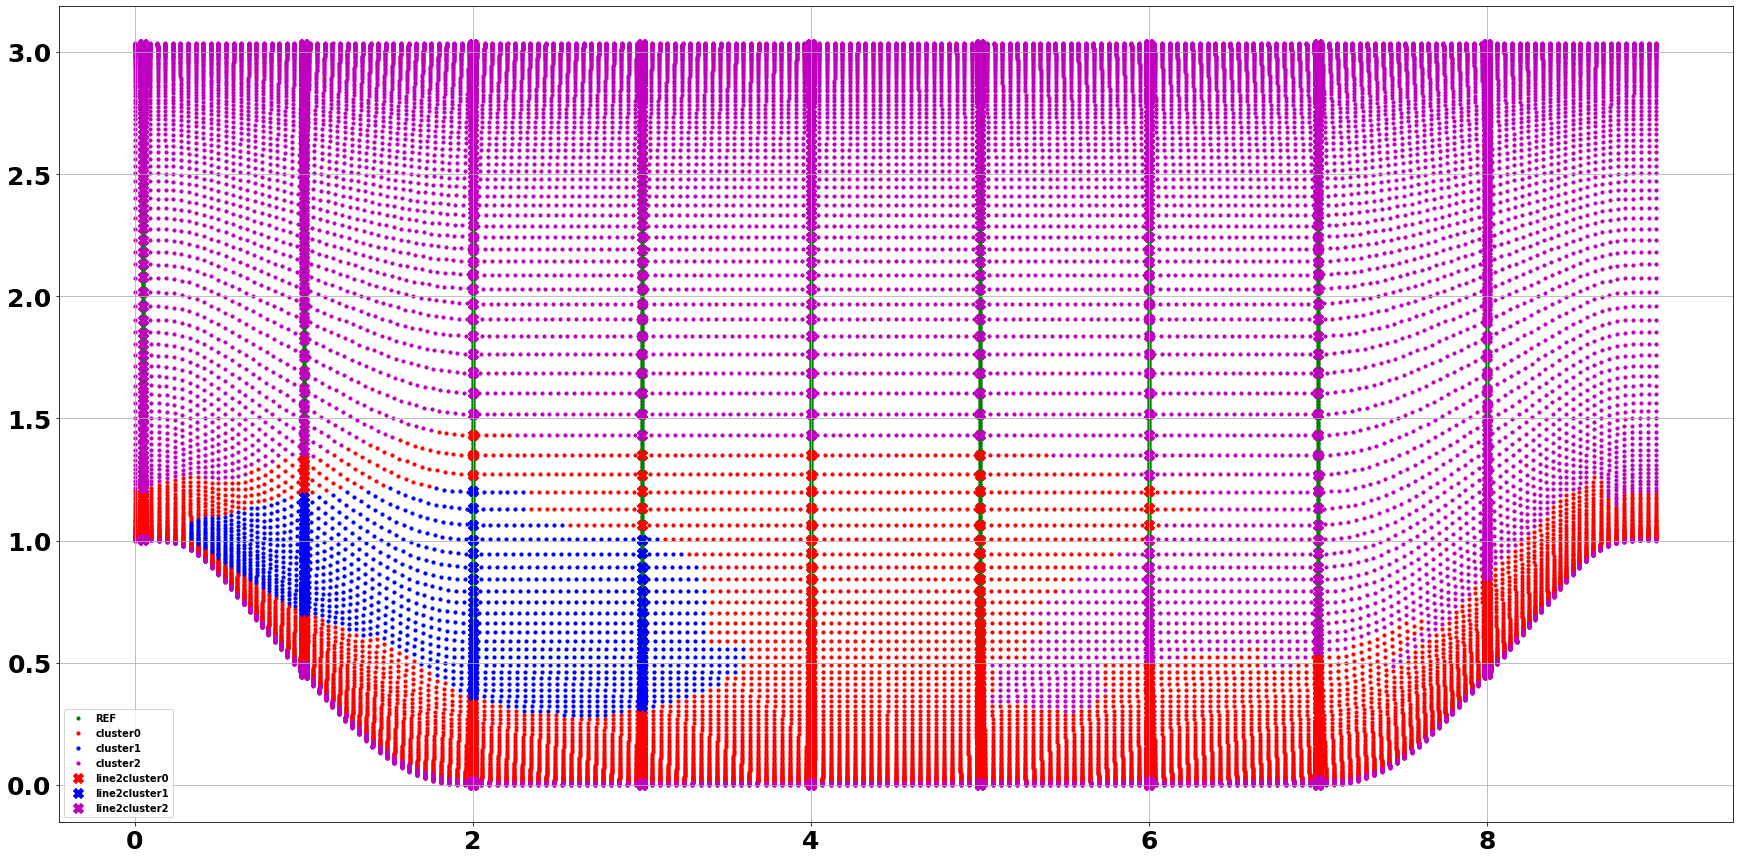

In [105]:
plt.figure(figsize=(30,15))
plt.scatter(x, y,                         c='g', s=10, label='REF')
plt.scatter(cluster0[:,0], cluster0[:,1], c='r', s=10, label='cluster0')
plt.scatter(cluster1[:,0], cluster1[:,1], c='b', s=10, label='cluster1')
plt.scatter(cluster2[:,0], cluster2[:,1], c='m', s=10, label='cluster2')
#plt.scatter(data_cluster0_x, data_cluster0_y, c='r', marker="X", s=100, label='line2cluster0')
#plt.scatter(data_cluster1_x, data_cluster1_y, c='b', marker="X", s=100, label='line2cluster1')
#plt.scatter(data_cluster2_x, data_cluster2_y, c='m', marker="X", s=100, label='line2cluster2')
plt.scatter(data_cluster0[:,0], data_cluster0[:,1], c='r', marker="X", s=100, label='line2cluster0')
plt.scatter(data_cluster1[:,0], data_cluster1[:,1], c='b', marker="X", s=100, label='line2cluster1')
plt.scatter(data_cluster2[:,0], data_cluster2[:,1], c='m', marker="X", s=100, label='line2cluster2')
plt.grid()
plt.legend()
plt.show()
plt.close()

In [106]:
#data_cluster0 = np.transpose([data_cluster0_x, data_cluster0_y])
#data_cluster1 = np.transpose([data_cluster1_x, data_cluster1_y])
#data_cluster2 = np.transpose([data_cluster2_x, data_cluster2_y])

In [107]:
#np.savetxt('data_cluster0.txt', data_cluster0, delimiter =' ')   
#np.savetxt('data_cluster1.txt', data_cluster1, delimiter =' ')   
#np.savetxt('data_cluster2.txt', data_cluster2, delimiter =' ')   

In [110]:
for c in range(0,3):
    
    with open('data_cluster'+str(c)+'.txt', 'r') as f:
        lines = f.readlines()

    with open('data_cluster'+str(c)+'.H', 'w') as f:
          f.writelines([''.join(['(', line.strip(), ')\n']) for line in lines])